## Inspect training data

In [1]:
import os
import glob
import pydicom
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from pneumonia import PneumoniaDataset
from functions import get_image_fps, parse_dataset

In [4]:
DATA_DIR = '../data'
TRAIN_DIR = os.path.join(DATA_DIR, 'stage_1_train_images')
TEST_DIR = os.path.join(DATA_DIR, 'stage_1_test_images')

ORIG_SIZE = 1024

In [5]:
# Parse dataset
annotations = pd.read_csv(os.path.join(DATA_DIR, 'stage_1_train_labels.csv'))
image_fps, image_annotations = parse_dataset(TRAIN_DIR, annotations)

In [6]:
# Split dataset into training vs. validation dataset 
# Split ratio is set to 0.9 vs. 0.1 (train vs. validation, respectively)
image_fps_list = list(image_fps)
random.seed(42)
random.shuffle(image_fps_list)

val_size = 1500
image_fps_train = image_fps_list[val_size:]
image_fps_val = image_fps_list[:val_size]

print('train_size=', len(image_fps_train))
print('validation_size=', (len(image_fps_val)))

train_size= 24184
validation_size= 1500


In [7]:
# Prepare the training dataset
dataset_train = PneumoniaDataset(image_fps_train, image_annotations, ORIG_SIZE, ORIG_SIZE)
dataset_train.prepare()

In [8]:
# Show annotation(s) for a DICOM image 
test_fp = random.choice(image_fps_train)
image_annotations[test_fp]

[patientId    aa78c3b4-938c-4168-9840-78537016da77
 x                                             NaN
 y                                             NaN
 width                                         NaN
 height                                        NaN
 Target                                          0
 Name: 17928, dtype: object]

(1024, 1024, 3)
../data/stage_1_train_images/9ded4d8b-5e88-4470-bb20-1d55d76d6658.dcm
[1 1]


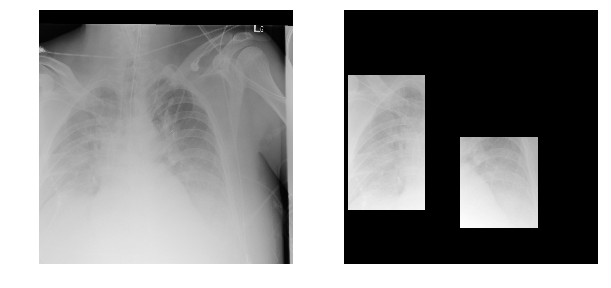

In [9]:
# Load and display random sample and their bounding boxes

class_ids = [0]
while class_ids[0] == 0:  ## look for a mask
    image_id = random.choice(dataset_train.image_ids)
    image_fp = dataset_train.image_reference(image_id)
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)

print(image.shape)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
masked = np.zeros(image.shape[:2])
for i in range(mask.shape[2]):
    masked += image[:, :, 0] * mask[:, :, i]
plt.imshow(masked, cmap='gray')
plt.axis('off')

print(image_fp)
print(class_ids)